In [170]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [171]:
%cd 'drive/MyDrive/Classroom/Machine Learning 2565-1/Project'

[Errno 2] No such file or directory: 'drive/MyDrive/Classroom/Machine Learning 2565-1/Project'
/content/drive/MyDrive/Classroom/Machine Learning 2565-1/Project


# Import Library

In [172]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from scipy import stats,mean
import keras
from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM,Flatten
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from keras_tuner import RandomSearch

# Data Preparation

In [174]:
return_period=1

**Concat dataframe**

In [175]:
meta_stock_data=pd.read_csv('meta_stock_data.csv')
spy_index_data=pd.read_csv('spy_index.csv')
sentiments_data=pd.read_csv('sentiments.csv')

In [176]:
meta_stock_data['time']= pd.to_datetime(meta_stock_data['time'])
meta_stock_data=meta_stock_data.set_index('time')
rename_columns={'open': 'stock_open', 'high': 'stock_high', 'low': 'stock_low', 'close': 'stock_close', 'volume': 'stock_volume'}
meta_stock_data.rename(columns=rename_columns, inplace=True)
meta_stock_data

,stock_open,stock_high,stock_low,stock_close,stock_volume
time,,,,,
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250
...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433


In [177]:
# meta_stock_data[['close_3DT']] = meta_stock_data[['stock_close']].diff(3*return_period).shift(-3*return_period)
# meta_stock_data[['close_6DT']] = meta_stock_data[['stock_close']].diff(6*return_period).shift(-6*return_period)
# meta_stock_data[['close_12DT']] = meta_stock_data[['stock_close']].diff(12*return_period).shift(-12*return_period)

In [178]:
# meta_stock_data[['MA20_Close_Price']]=meta_stock_data[['stock_close']].rolling(20,min_periods=1).mean()
meta_stock_data

,stock_open,stock_high,stock_low,stock_close,stock_volume
time,,,,,
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250
...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433


In [179]:
meta_stock_data

,stock_open,stock_high,stock_low,stock_close,stock_volume
time,,,,,
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250
...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433


In [180]:
spy_index_data['time']= pd.to_datetime(spy_index_data['time'])
spy_index_data=spy_index_data.set_index('time')
rename_columns={'open': 'spy_open', 'high': 'spy_high', 'low': 'spy_low', 'close': 'spy_close', 'volume': 'spy_volume'}
spy_index_data.rename(columns=rename_columns, inplace=True)
spy_index_data

,spy_open,spy_high,spy_low,spy_close,spy_volume
time,,,,,
2022-09-06 04:05:00,393.201961,393.341383,392.415218,393.082455,5700
2022-09-06 04:10:00,392.893239,392.972909,392.644270,392.713981,3809
2022-09-06 04:15:00,392.624352,392.624352,392.305672,392.514806,7663
2022-09-06 04:20:00,392.375383,392.474971,392.275796,392.474971,3424
2022-09-06 04:25:00,392.574559,392.634311,392.375383,392.375383,7496
...,...,...,...,...,...
2022-11-04 19:40:00,375.900000,375.900000,375.900000,375.900000,668
2022-11-04 19:45:00,375.860000,375.920000,375.850000,375.920000,496
2022-11-04 19:50:00,375.890000,375.890000,375.890000,375.890000,352


In [181]:
sentiments_data

,time_published,overall_sentiment_score
0,20220906T041341,-0.150708
1,20220906T065202,0.211602
2,20220906T065525,-0.029117
3,20220906T080628,-0.153809
4,20220906T084724,-0.016648
...,...,...
5886,20221105T120000,0.156347
5887,20221105T120011,0.240819
5888,20221105T123400,0.142550
5889,20221105T124000,0.024357


In [182]:
resample_rule = '5T'

sentiments_data['time_published']= pd.to_datetime(sentiments_data['time_published'])
sentiments_data = sentiments_data.set_index('time_published').resample(resample_rule,).mean().ffill()
sentiments_data

,overall_sentiment_score
time_published,
2022-09-06 04:10:00,-0.150708
2022-09-06 04:15:00,-0.150708
2022-09-06 04:20:00,-0.150708
2022-09-06 04:25:00,-0.150708
2022-09-06 04:30:00,-0.150708
...,...
2022-11-05 13:00:00,0.024357
2022-11-05 13:05:00,0.024357
2022-11-05 13:10:00,0.024357


In [183]:
df=pd.concat([meta_stock_data,spy_index_data, sentiments_data], axis=1)
df

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.44,161.44,161.44,161.44,711.0,393.201961,393.341383,392.415218,393.082455,5700.0,NaN
2022-09-06 04:10:00,160.88,160.88,160.88,160.88,320.0,392.893239,392.972909,392.644270,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.87,160.87,160.87,160.87,782.0,392.624352,392.624352,392.305672,392.514806,7663.0,-0.150708
2022-09-06 04:20:00,NaN,NaN,NaN,NaN,NaN,392.375383,392.474971,392.275796,392.474971,3424.0,-0.150708
2022-09-06 04:25:00,NaN,NaN,NaN,NaN,NaN,392.574559,392.634311,392.375383,392.375383,7496.0,-0.150708
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-05 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357
2022-11-05 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024357


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17392 entries, 2022-09-06 04:05:00 to 2022-11-05 13:20:00
Freq: 5T
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_open               7733 non-null   float64
 1   stock_high               7733 non-null   float64
 2   stock_low                7733 non-null   float64
 3   stock_close              7733 non-null   float64
 4   stock_volume             7733 non-null   float64
 5   spy_open                 8421 non-null   float64
 6   spy_high                 8421 non-null   float64
 7   spy_low                  8421 non-null   float64
 8   spy_close                8421 non-null   float64
 9   spy_volume               8421 non-null   float64
 10  overall_sentiment_score  17391 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [185]:
df.describe()

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
count,7733.000000,7733.000000,7733.000000,7733.000000,7.733000e+03,8421.000000,8421.000000,8421.000000,8421.000000,8.421000e+03,17391.000000
mean,132.920193,133.105955,132.734105,132.909619,2.474559e+05,376.989501,377.248493,376.713359,376.984896,4.937408e+05,0.119567
std,20.409761,20.403370,20.409413,20.414282,4.953656e+05,12.932224,12.902475,12.961322,12.930274,8.357391e+05,0.175800
min,88.300000,88.579800,88.090000,88.300000,1.000000e+02,348.360000,349.240000,348.110000,348.370000,1.000000e+02,-0.608177
25%,128.650000,128.800000,128.480000,128.670000,2.456000e+03,366.540000,366.860700,366.160000,366.513700,9.412000e+03,0.007241
50%,135.990000,136.117400,135.830000,135.990000,3.302900e+04,375.200000,375.450000,374.940000,375.210000,8.579700e+04,0.128948
75%,144.560000,144.740000,144.430000,144.540000,3.230970e+05,386.051567,386.260000,385.803600,386.051567,7.539560e+05,0.238353
max,171.110000,171.390000,170.840000,171.090000,1.643237e+07,412.521967,413.308709,412.123616,412.292915,1.952209e+07,0.706399


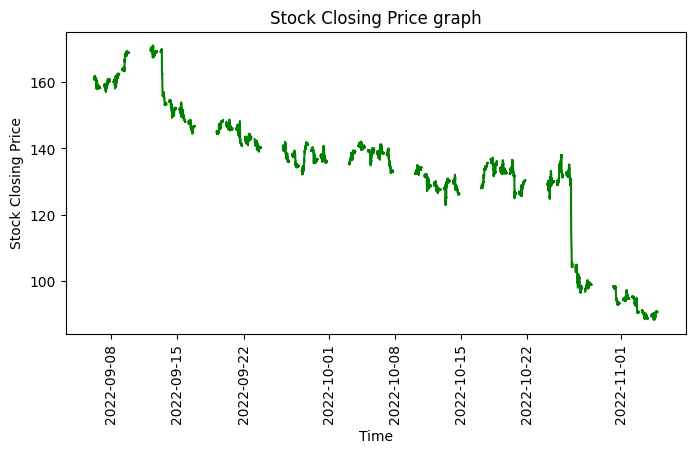

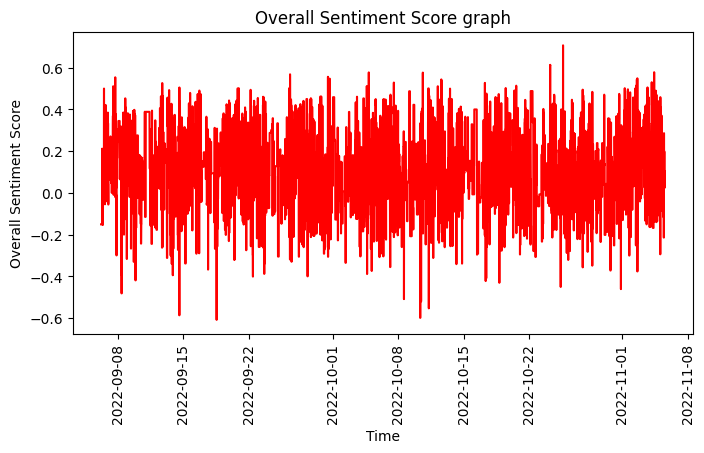

In [186]:
plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(df['stock_close'],label='Close',color='green')
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title('Stock Closing Price graph')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(df['overall_sentiment_score'],label='Sentiment Score',color='red')
plt.xlabel("Time")
plt.ylabel("Overall Sentiment Score")
plt.title('Overall Sentiment Score graph')
plt.xticks(rotation=90)
plt.show()

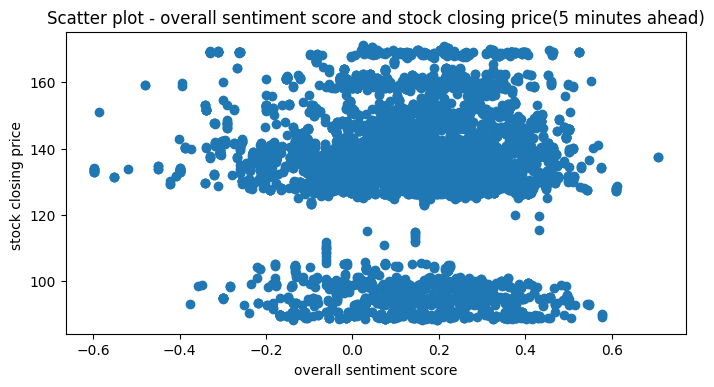

In [187]:
  plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
  plt.scatter(df['overall_sentiment_score'], df['stock_close'].shift(-1))
  plt.xlabel("overall sentiment score")
  plt.ylabel("stock closing price ")
  plt.title('Scatter plot - overall sentiment score and stock closing price(5 minutes ahead)')
  plt.show()

**Remove the row that has na more than 3**

In [188]:
df.dropna(thresh=9,inplace=True)
df

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.44,161.4400,161.44,161.4400,711.0,393.201961,393.341383,392.415218,393.082455,5700.0,NaN
2022-09-06 04:10:00,160.88,160.8800,160.88,160.8800,320.0,392.893239,392.972909,392.644270,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.87,160.8700,160.87,160.8700,782.0,392.624352,392.624352,392.305672,392.514806,7663.0,-0.150708
2022-09-06 04:45:00,161.28,161.7700,161.28,161.5000,1072.0,392.624352,392.972909,392.624352,392.813569,48597.0,-0.150708
2022-09-06 04:50:00,161.60,161.6000,161.60,161.6000,250.0,392.813569,393.002785,392.773734,392.773734,12287.0,-0.150708
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04 19:40:00,90.72,90.7200,90.70,90.7200,3255.0,375.900000,375.900000,375.900000,375.900000,668.0,0.100364
2022-11-04 19:45:00,90.72,90.8000,90.65,90.7100,5187.0,375.860000,375.920000,375.850000,375.920000,496.0,0.100364
2022-11-04 19:50:00,90.65,90.6901,90.65,90.6901,1433.0,375.890000,375.890000,375.890000,375.890000,352.0,0.100364
2022-11-04 19:55:00,90.73,90.7300,90.63,90.6500,2778.0,375.940000,375.980000,375.670000,375.980000,11561.0,0.100364


In [189]:
values = dict([(d, df[d].mean()) for d in df.columns])
values

{'stock_open': 132.9336313285807,
 'stock_high': 133.1197831169151,
 'stock_low': 132.74718953985743,
 'stock_close': 132.92305149708358,
 'stock_volume': 248029.75981853533,
 'spy_open': 376.8817758490992,
 'spy_high': 377.1548485445885,
 'spy_low': 376.58991878939725,
 'spy_close': 376.876443553895,
 'spy_volume': 537901.8601425794,
 'overall_sentiment_score': 0.1475200711642098}

**Fill na with mean**

In [190]:
df.fillna(value=values,inplace=True)

In [191]:
x_df=df

In [192]:
y_df=df[['stock_close']]
y_df

,stock_close
2022-09-06 04:05:00,161.4400
2022-09-06 04:10:00,160.8800
2022-09-06 04:15:00,160.8700
2022-09-06 04:45:00,161.5000
2022-09-06 04:50:00,161.6000
...,...
2022-11-04 19:40:00,90.7200
2022-11-04 19:45:00,90.7100
2022-11-04 19:50:00,90.6901
2022-11-04 19:55:00,90.6500


**Feature Selection**

In [193]:
dataCorr=df.corr()
dataCorr

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
stock_open,1.000000,0.999790,0.999877,0.999859,-0.254587,0.306669,0.306803,0.305969,0.306759,-0.004209,0.008578
stock_high,0.999790,1.000000,0.999582,0.999686,-0.249004,0.306572,0.306925,0.305849,0.306812,-0.000565,0.008356
stock_low,0.999877,0.999582,1.000000,0.999927,-0.259381,0.306451,0.306558,0.306029,0.306753,-0.008476,0.008794
stock_close,0.999859,0.999686,0.999927,1.000000,-0.254977,0.306176,0.306457,0.305683,0.306616,-0.004703,0.008412
stock_volume,-0.254587,-0.249004,-0.259381,-0.254977,1.000000,0.057953,0.064565,0.051744,0.058016,0.434654,-0.002874
spy_open,0.306669,0.306572,0.306451,0.306176,0.057953,1.000000,0.999558,0.999307,0.999350,-0.051803,0.040272
spy_high,0.306803,0.306925,0.306558,0.306457,0.064565,0.999558,1.000000,0.998856,0.999453,-0.042757,0.039540
spy_low,0.305969,0.305849,0.306029,0.305683,0.051744,0.999307,0.998856,1.000000,0.999445,-0.063075,0.040180
spy_close,0.306759,0.306812,0.306753,0.306616,0.058016,0.999350,0.999453,0.999445,1.000000,-0.053010,0.039843
spy_volume,-0.004209,-0.000565,-0.008476,-0.004703,0.434654,-0.051803,-0.042757,-0.063075,-0.053010,1.000000,0.017770


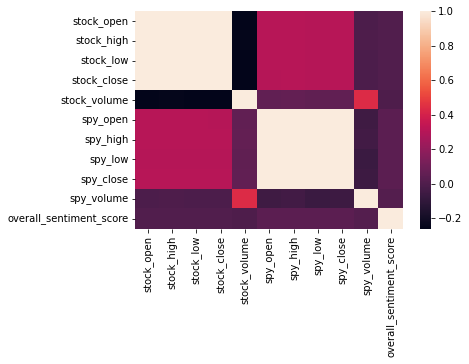

In [194]:
sns.heatmap(dataCorr)

In [195]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,stock_open,stock_high,stock_low,stock_close,stock_volume,spy_open,spy_high,spy_low,spy_close,spy_volume,overall_sentiment_score
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.999790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.999877,0.999582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.999859,0.999686,0.999927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,-0.254587,-0.249004,-0.259381,-0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
5,0.306669,0.306572,0.306451,0.306176,0.057953,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
6,0.306803,0.306925,0.306558,0.306457,0.064565,0.999558,0.000000,0.000000,0.000000,0.00000,0.0
7,0.305969,0.305849,0.306029,0.305683,0.051744,0.999307,0.998856,0.000000,0.000000,0.00000,0.0
8,0.306759,0.306812,0.306753,0.306616,0.058016,0.999350,0.999453,0.999445,0.000000,0.00000,0.0
9,-0.004209,-0.000565,-0.008476,-0.004703,0.434654,-0.051803,-0.042757,-0.063075,-0.053010,0.00000,0.0


In [196]:
to_drop = [column for column in lower if any(np.absolute(lower[column]) > 0.90)]
print('to_drop',to_drop)
x_df.drop(to_drop, inplace=True, axis=1)
x_df

to_drop ['stock_open', 'stock_high', 'stock_low', 'spy_open', 'spy_high', 'spy_low']


,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,161.4400,711.0,393.082455,5700.0,0.147520
2022-09-06 04:10:00,160.8800,320.0,392.713981,3809.0,-0.150708
2022-09-06 04:15:00,160.8700,782.0,392.514806,7663.0,-0.150708
2022-09-06 04:45:00,161.5000,1072.0,392.813569,48597.0,-0.150708
2022-09-06 04:50:00,161.6000,250.0,392.773734,12287.0,-0.150708
...,...,...,...,...,...
2022-11-04 19:40:00,90.7200,3255.0,375.900000,668.0,0.100364
2022-11-04 19:45:00,90.7100,5187.0,375.920000,496.0,0.100364
2022-11-04 19:50:00,90.6901,1433.0,375.890000,352.0,0.100364
2022-11-04 19:55:00,90.6500,2778.0,375.980000,11561.0,0.100364


**Standardize input feature**

In [197]:
x_df = stats.zscore(x_df)
x_df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


**Seperate test data**

In [198]:
x_df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


In [199]:
remain_size=len(x_df)-528
remain_size

7187

In [200]:
copy_x_df=x_df.copy()
x_df_test=copy_x_df.iloc[remain_size: , :]
x_df=x_df.iloc[:remain_size , :]
x_df_test

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-11-02 07:05:00,-1.856947,-0.485026,0.607829,-0.609489,0.726702
2022-11-02 07:10:00,-1.862836,-0.491651,0.604673,-0.618948,0.743402
2022-11-02 07:15:00,-1.857437,-0.495648,0.617297,-0.623680,0.743402
2022-11-02 07:20:00,-1.863327,-0.494190,0.629133,-0.618703,0.743402
2022-11-02 07:25:00,-1.865291,-0.497252,0.617297,-0.610727,0.743402
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


In [201]:
copy_y_df=y_df.copy()
y_df_test=copy_y_df.iloc[remain_size: , :]
y_df=y_df.iloc[:remain_size , :]
y_df_test

,stock_close
2022-11-02 07:05:00,95.0900
2022-11-02 07:10:00,94.9700
2022-11-02 07:15:00,95.0800
2022-11-02 07:20:00,94.9600
2022-11-02 07:25:00,94.9200
...,...
2022-11-04 19:40:00,90.7200
2022-11-04 19:45:00,90.7100
2022-11-04 19:50:00,90.6901
2022-11-04 19:55:00,90.6500


In [202]:
x_df_test.to_csv('x_df_test.csv')
y_df_test.to_csv('y_df_test.csv')

In [203]:
x_df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-02 06:30:00,-1.858910,-0.496657,0.627555,-0.624719,0.329271
2022-11-02 06:35:00,-1.858910,-0.499914,0.612563,-0.623262,0.329271
2022-11-02 06:40:00,-1.859892,-0.499888,0.602306,-0.622110,0.329271
2022-11-02 06:50:00,-1.864309,-0.494906,0.590470,-0.587711,0.329271


In [204]:
y_df

,stock_close
2022-09-06 04:05:00,161.44
2022-09-06 04:10:00,160.88
2022-09-06 04:15:00,160.87
2022-09-06 04:45:00,161.50
2022-09-06 04:50:00,161.60
...,...
2022-11-02 06:30:00,95.05
2022-11-02 06:35:00,95.05
2022-11-02 06:40:00,95.03
2022-11-02 06:50:00,94.94


**remove outlier using z-score**

In [205]:
for c in x_df.columns:
  x_df.loc[(x_df[c] > 3) | (x_df[c] < -3) , c] = x_df[c].median()
x_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-02 06:30:00,-1.858910,-0.496657,0.627555,-0.624719,0.329271
2022-11-02 06:35:00,-1.858910,-0.499914,0.612563,-0.623262,0.329271
2022-11-02 06:40:00,-1.859892,-0.499888,0.602306,-0.622110,0.329271
2022-11-02 06:50:00,-1.864309,-0.494906,0.590470,-0.587711,0.329271


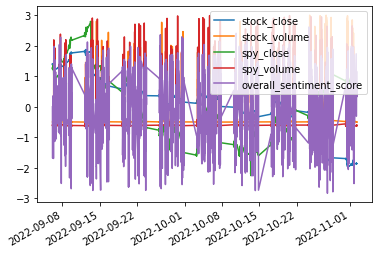

In [206]:
x_df.plot()

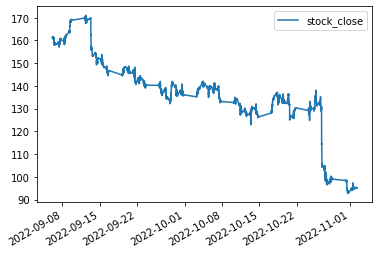

In [207]:
y_df.plot()

In [208]:
x_df.head(20)

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
2022-09-06 04:55:00,1.400178,-0.498660,1.276336,-0.620508,-1.672652
2022-09-06 05:05:00,1.386926,-0.499890,1.231547,-0.619188,-1.672652
2022-09-06 05:10:00,1.391834,-0.499709,1.215046,-0.622868,-1.672652
2022-09-06 05:20:00,1.390853,-0.499424,1.222903,-0.624155,-1.672652
2022-09-06 05:25:00,1.392325,-0.498981,1.248834,-0.623849,-1.672652


In [209]:
y_df.head(20)

,stock_close
2022-09-06 04:05:00,161.44
2022-09-06 04:10:00,160.88
2022-09-06 04:15:00,160.87
2022-09-06 04:45:00,161.50
2022-09-06 04:50:00,161.60
2022-09-06 04:55:00,161.45
2022-09-06 05:05:00,161.18
2022-09-06 05:10:00,161.28
2022-09-06 05:20:00,161.26
2022-09-06 05:25:00,161.29


# Model Building and Trainning

# Linear Regression

In [210]:
def prepareDataForLR(x_df,y_df,return_period):
  y_df=y_df.shift(-return_period)
  y_df=y_df.iloc[:-(return_period) , :]
  x_df=x_df.iloc[:-(return_period) , :]
  return x_df,y_df

In [211]:
x_df,y_df=prepareDataForLR(x_df,y_df,return_period)

In [212]:
x_train, x_validation, y_train, y_validation = train_test_split(x_df , y_df,test_size=0.05)

In [213]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [214]:
def plotStockPrice(actual,predict,timestep,name):
  plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
  plt.plot(actual, color='red', label = 'Actual Closing Price')
  plt.plot(predict, color='green', label = 'Predicted Closing Price')
  plt.title(name+' Actual vs Predicted - Stock Closing Price '+timestep)
  plt.xlabel('Index')
  plt.ylabel('Stock Price')
  plt.legend(loc='best')
  plt.show()

  plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
  plt.scatter(actual, predict)
  plt.xlabel("actual")
  plt.ylabel("predicted")
  plt.title(name+' Scatter plot - actual vs predicted '+timestep)
  plt.show()
def showResult(x_test,y_test,descript,model,timestep,name):
  pred=model.predict(x_test)
  r2_model_before_tuning=r2_score(np.array(y_test), pred)
  print('R2 score '+descript+':',r2_model_before_tuning)
  mse_model_before_tuning=mean_squared_error(np.array(y_test), pred)
  print('mean_squared_error '+descript+':',mse_model_before_tuning)

  plotStockPrice(np.array(y_test),pred,timestep,name)
  return pred,r2_model_before_tuning,mse_model_before_tuning


R2 score before tuning: 0.9984434467819332
mean_squared_error before tuning: 0.43139752782985064


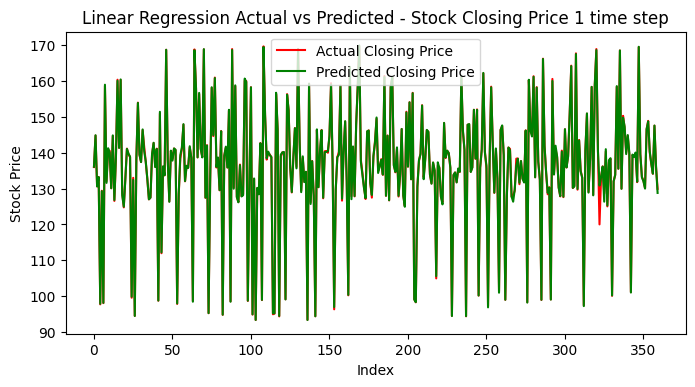

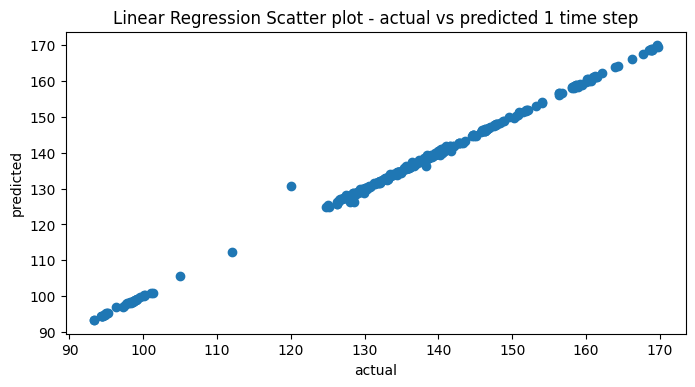

In [215]:
pred,r2_lr_before_tuning,mse_lr_before_tuning=showResult(x_validation,y_validation,'before tuning',lr,'1 time step','Linear Regression')

# Hyperparameter Tuning for Linear Regression

In [216]:
# Create Model List
regression = LinearRegression()

In [217]:
# Create Parameter Dictionary for Linear Regression
fit_intercept = [True, False]
normalize = [True, False]
positive=[True,False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize,positive=positive)
params_LR

{'fit_intercept': [True, False],
 'normalize': [True, False],
 'positive': [True, False]}

In [218]:
k=10

model = regression
params = params_LR
rand_search = RandomizedSearchCV( estimator=model, n_jobs =8,
verbose = 1,
cv = k,
n_iter=100,
scoring = 'neg_mean_squared_error',
param_distributions = params )

rand_search_result = rand_search.fit(x_train, y_train)


Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [219]:
# Show Best Parameters for both models
print('Best params for linear regression: ',rand_search_result.best_params_)
print('Best score for linear regression: ', abs(rand_search_result.best_score_))


Best params for linear regression:  {'positive': False, 'normalize': False, 'fit_intercept': True}
Best score for linear regression:  0.1188077474402975


In [220]:
# Show Score for each parameter combination for both model
means_lr = abs(rand_search_result.cv_results_['mean_test_score'])
stds_lr = rand_search_result.cv_results_['std_test_score']
params_lr = rand_search_result.cv_results_['params']
for mean, stdev, param in zip(means_lr, stds_lr, params_lr):
  print("%f (%f) with: %r" % (mean, stdev, param))

0.118864 (0.026482) with: {'positive': True, 'normalize': True, 'fit_intercept': True}
0.118808 (0.026506) with: {'positive': False, 'normalize': True, 'fit_intercept': True}
0.118864 (0.026482) with: {'positive': True, 'normalize': False, 'fit_intercept': True}
0.118808 (0.026506) with: {'positive': False, 'normalize': False, 'fit_intercept': True}
17130.106894 (201.710965) with: {'positive': True, 'normalize': True, 'fit_intercept': False}
16699.151601 (246.771774) with: {'positive': False, 'normalize': True, 'fit_intercept': False}
17130.106894 (201.710965) with: {'positive': True, 'normalize': False, 'fit_intercept': False}
16699.151601 (246.771774) with: {'positive': False, 'normalize': False, 'fit_intercept': False}


In [51]:
def plotBarChart(means_model,stds_model,model_name,params_model):
  width = 0.35  # the width of the bars
  x = np.arange(len(means_model)) 
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, means_model,width, label='mean')
  rects2 = ax.bar(x + width/2, stds_model,width, label='std')
  fig.set_size_inches(15,12, forward=True)

  ax.set_ylabel('MSE')
  ax.set_xlabel('parameter')
  ax.set_title('RandomSearchCV - '+model_name+': MSE Mean,MSE STD')

  ax.set_xticks(x)
  ax.set_xticklabels(params_model)
 
  ax.legend()

  ax.set_yscale('log')
  fig.tight_layout()
  plt.xticks(rotation=90)
  plt.show()

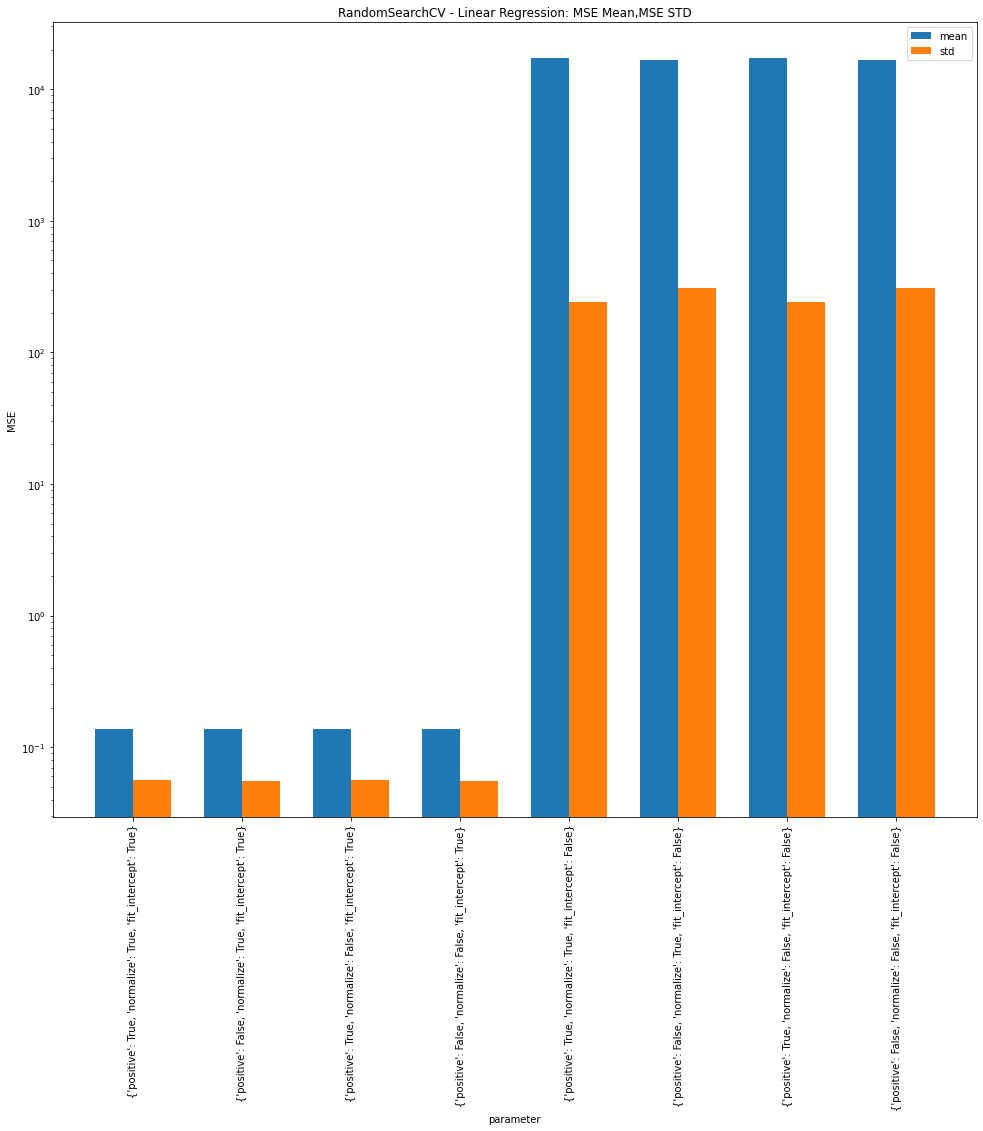

In [52]:
plotBarChart(means_lr,stds_lr,'Linear Regression',params_lr)

In [53]:
lr_best_params=rand_search_result.best_params_
best_lr = LinearRegression(positive=lr_best_params['positive'],normalize=lr_best_params['normalize'], fit_intercept=lr_best_params['fit_intercept'])
best_lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

R2 score after tuning: 0.999730072350911
mean_squared_error after tuning: 0.09499653673779451


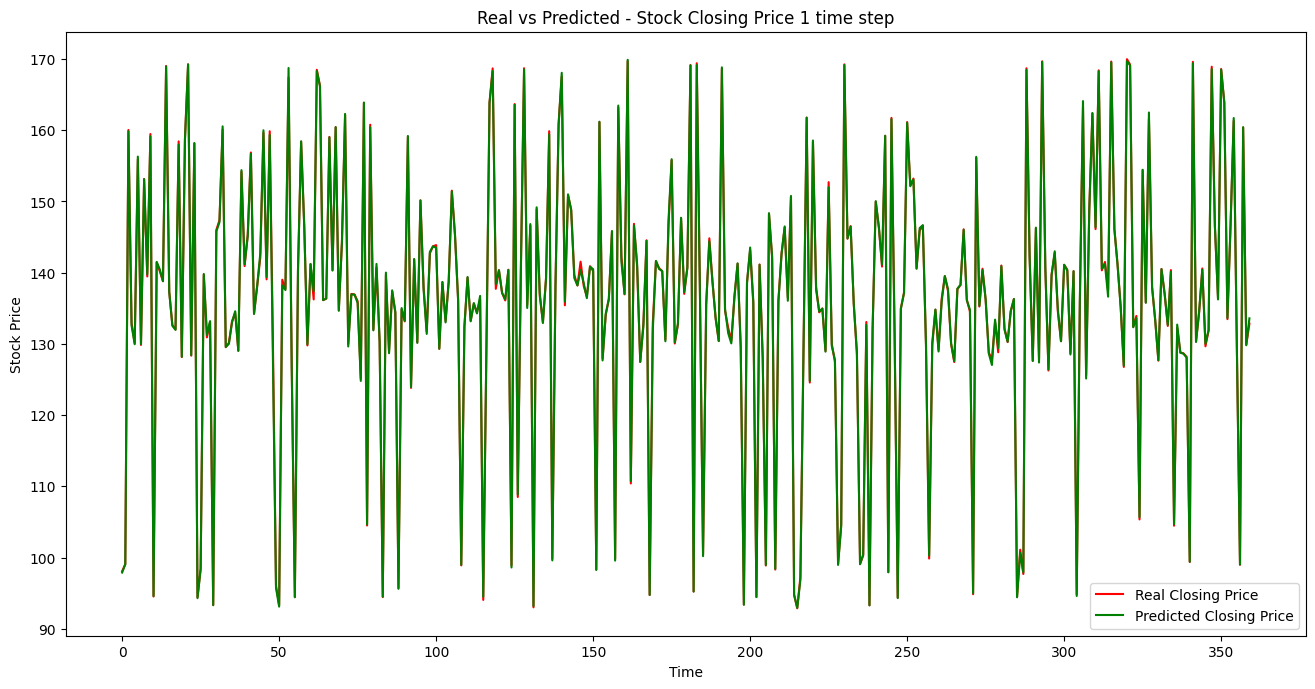

In [54]:
pred,r2_lr_before_tuning,mse_lr_before_tuning=showResult(x_validation,y_validation,'after tuning',lr,'1 time step')

# Model Testing for Linear Regression

In [55]:
x_df_test

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-11-02 07:05:00,-1.856947,-0.485026,0.607829,-0.609489,0.726702
2022-11-02 07:10:00,-1.862836,-0.491651,0.604673,-0.618948,0.743402
2022-11-02 07:15:00,-1.857437,-0.495648,0.617297,-0.623680,0.743402
2022-11-02 07:20:00,-1.863327,-0.494190,0.629133,-0.618703,0.743402
2022-11-02 07:25:00,-1.865291,-0.497252,0.617297,-0.610727,0.743402
...,...,...,...,...,...
2022-11-04 19:40:00,-2.071438,-0.493728,-0.077044,-0.624992,-0.264481
2022-11-04 19:45:00,-2.071929,-0.489831,-0.075466,-0.625192,-0.264481
2022-11-04 19:50:00,-2.072905,-0.497403,-0.077833,-0.625360,-0.264481
2022-11-04 19:55:00,-2.074874,-0.494690,-0.070732,-0.612320,-0.264481


In [56]:
return_period=1

In [57]:
x_df_test_1,y_df_test_1=prepareDataForLR(x_df_test,y_df_test,return_period)

R2 score after tuning: 0.999543931049459
mean_squared_error after tuning: 0.0012669475177630913


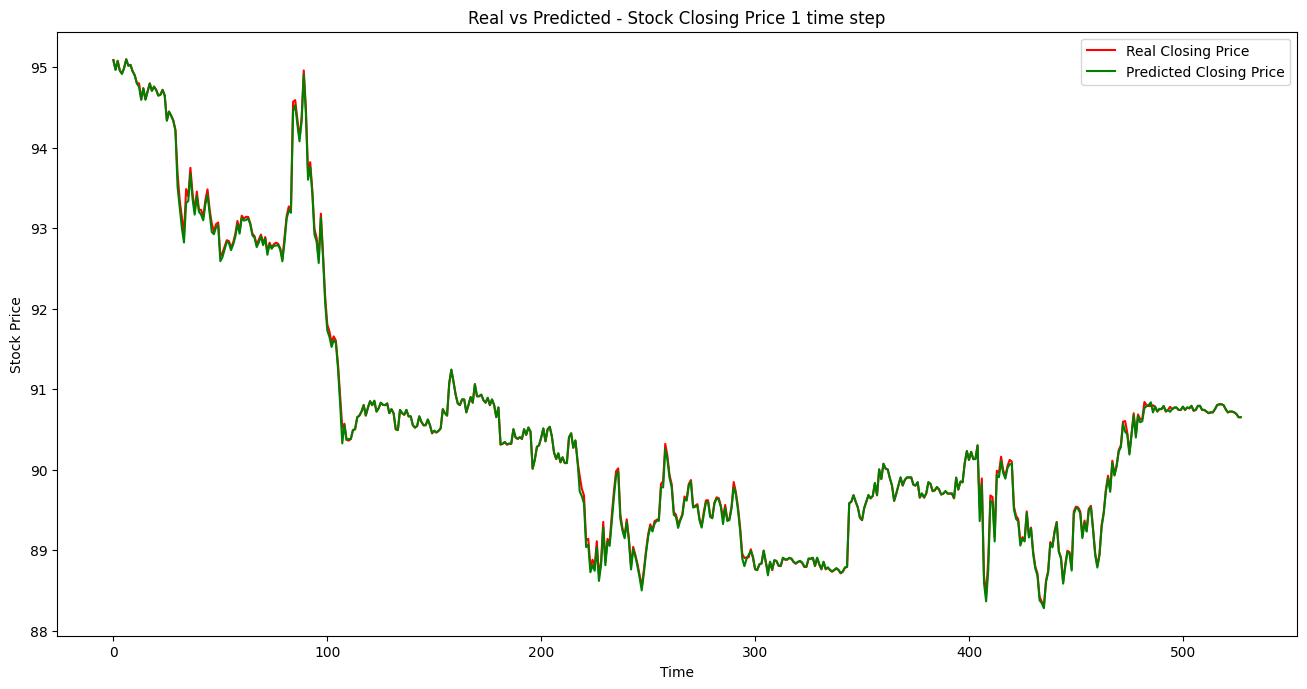

In [58]:
pred_1,r2_lr_best_1,mse_lr_best_1=showResult(x_df_test,y_df_test,'after tuning',best_lr,'1 time step')

In [59]:
return_period=24
x_df_test_24,y_df_test_24=prepareDataForLR(x_df_test,y_df_test,return_period)

R2 score after tuning: 0.999543931049459
mean_squared_error after tuning: 0.0012669475177630913


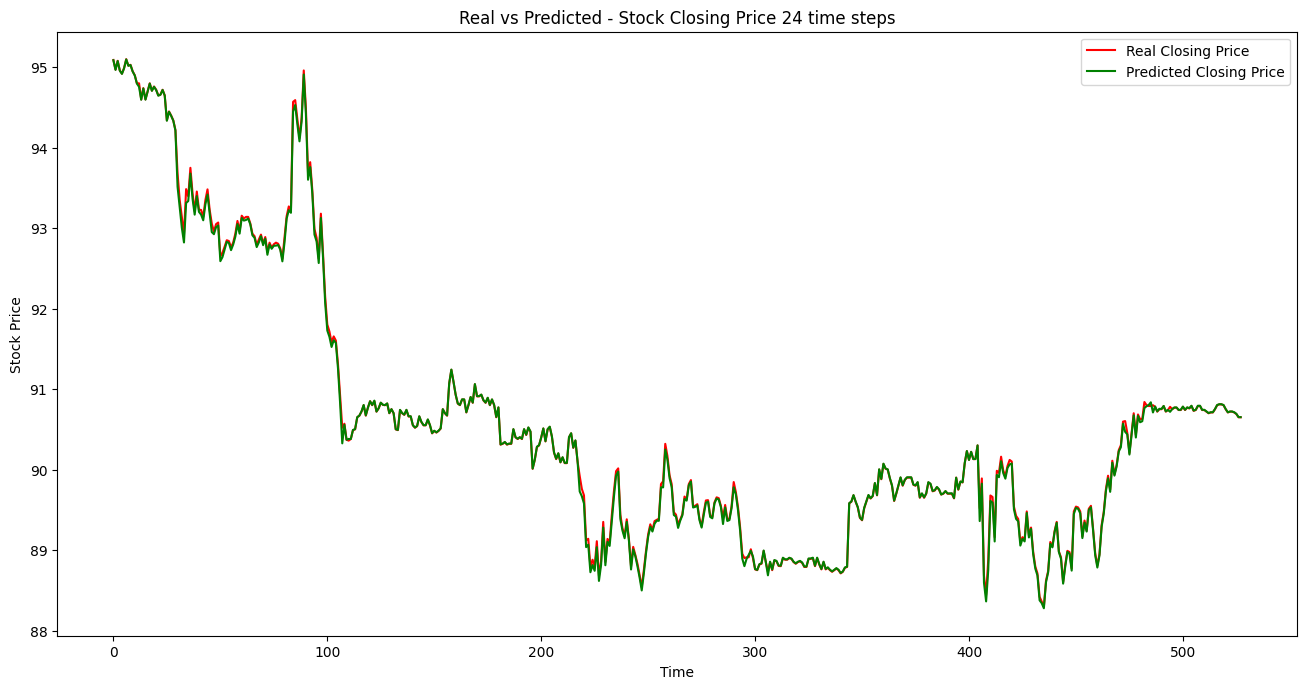

In [60]:
pred_24,r2_lr_best_24,mse_lr_best_24=showResult(x_df_test,y_df_test,'after tuning',best_lr,'24 time steps')

# LSTM

In [61]:
x_df

,stock_close,stock_volume,spy_close,spy_volume,overall_sentiment_score
2022-09-06 04:05:00,1.399687,-0.498860,1.278693,-0.619138,0.000000
2022-09-06 04:10:00,1.372201,-0.499648,1.249619,-0.621338,-1.672652
2022-09-06 04:15:00,1.371710,-0.498716,1.233904,-0.616854,-1.672652
2022-09-06 04:45:00,1.402632,-0.498131,1.257477,-0.569234,-1.672652
2022-09-06 04:50:00,1.407541,-0.499789,1.254334,-0.611475,-1.672652
...,...,...,...,...,...
2022-11-02 06:25:00,-1.857437,-0.494971,0.632289,-0.625187,0.329271
2022-11-02 06:30:00,-1.858910,-0.496657,0.627555,-0.624719,0.329271
2022-11-02 06:35:00,-1.858910,-0.499914,0.612563,-0.623262,0.329271
2022-11-02 06:40:00,-1.859892,-0.499888,0.602306,-0.622110,0.329271


In [62]:
return_period=1
n_steps=24
def prepareDataForLSTM(x_df,y_df,n_steps,return_period):
  x_df=np.array(x_df)
  y_df=np.array(y_df)
  x,y=[],[]
  for i in range(len(x_df)-n_steps-return_period+1):
    x.append(x_df[i:i+n_steps,:])
    y.append(y_df[(i+n_steps)+return_period-1,-1])
  x=np.array(x)
  y=np.array(y)
  return x,y
x,y=prepareDataForLSTM(x_df,y_df,n_steps,return_period)

In [63]:
print(x.shape)
x

(7162, 24, 5)


array([[[ 1.39968749, -0.49885953,  1.27869294, -0.61913792,
          0.        ],
        [ 1.37220121, -0.49964821,  1.24961944, -0.62133782,
         -1.6726522 ],
        [ 1.37171038, -0.49871632,  1.23390403, -0.61685426,
         -1.6726522 ],
        ...,
        [ 1.39379757, -0.49876876,  1.29440835, -0.61227298,
         -0.99069274],
        [ 1.39330675, -0.49904712,  1.26454907, -0.61500918,
         -0.99069274],
        [ 1.38790765, -0.49804463,  1.27240678, -0.61016848,
         -0.99069274]],

       [[ 1.37220121, -0.49964821,  1.24961944, -0.62133782,
         -1.6726522 ],
        [ 1.37171038, -0.49871632,  1.23390403, -0.61685426,
         -1.6726522 ],
        [ 1.40263245, -0.49813137,  1.25747714, -0.56923362,
         -1.6726522 ],
        ...,
        [ 1.39330675, -0.49904712,  1.26454907, -0.61500918,
         -0.99069274],
        [ 1.38790765, -0.49804463,  1.27240678, -0.61016848,
         -0.99069274],
        [ 1.37907278, -0.49888172,  1.26219176, 

In [ ]:
print(y.shape)
y

(7162, 1)


array([[160.6 ],
       [160.52],
       [160.7 ],
       ...,
       [ 95.03],
       [ 94.94],
       [ 95.  ]])

In [70]:
# Train / Test Preparation
# Test_size = int(0.3 * x.shape[0])
# Train_size = int(0.7 * x.shape[0])
# x_train, x_test = x[:Train_size , :], x[Train_size:x.shape[0]]
# y_train, y_test = y[:Train_size], y[Train_size:x.shape[0]]
x_train_lstm, x_validation_lstm, y_train_lstm, y_validation_lstm = train_test_split( x , y,test_size=0.2)

In [71]:
# ------------ LSTM Architecture parameter -------------------------------
LSTM_L1 = 20 
LSTM_L2 = 20 
dropRate_L1 = 0.25
dropRate_L2 = 0.25
D_out = 1
Activation = 'exponential'


inRow = x.shape[1]
inCol =x.shape[2]

Input_shape = (inRow, inCol)


In [72]:
# ------------ Create LSTM Model -------------------------------
model = Sequential()
model.add( LSTM ( LSTM_L1, return_sequences=True,
input_shape=Input_shape))
model.add(Dropout(dropRate_L1 ))
model.add(LSTM(LSTM_L2 ))
model.add(Dropout(dropRate_L2))
model.add(Dense(D_out, activation='exponential'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 20)            2080      
                                                                 
 dropout_2 (Dropout)         (None, 24, 20)            0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,381
Trainable params: 5,381
Non-trainable params: 0
_________________________________________________________________


In [73]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',
loss= "mean_squared_error")

In [74]:

EP = 1000
batch_size = 120
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [75]:
# ------ Train LSTM using 2D feature--------------------------------------------
# Training the model

history = model.fit( x_train_lstm, y_train_lstm, # try Option #1 และ Option #2
batch_size = batch_size,
validation_data=(x_validation_lstm, y_validation_lstm), epochs=EP,callbacks=[es])


Epoch 1/1000
48/48 [==============================] - 6s 47ms/step - loss: 16542.3320 - val_loss: 8069.8320
Epoch 2/1000
48/48 [==============================] - 1s 27ms/step - loss: 6311.2412 - val_loss: 3643.5981
Epoch 3/1000
48/48 [==============================] - 1s 27ms/step - loss: 5121.3438 - val_loss: 3823.7734
Epoch 4/1000
48/48 [==============================] - 1s 27ms/step - loss: 5118.0815 - val_loss: 3262.9138
Epoch 5/1000
48/48 [==============================] - 1s 28ms/step - loss: 4828.5332 - val_loss: 2060.4480
Epoch 6/1000
48/48 [==============================] - 1s 27ms/step - loss: 4821.2256 - val_loss: 3093.9333
Epoch 7/1000
48/48 [==============================] - 1s 27ms/step - loss: 4532.9780 - val_loss: 2317.7798
Epoch 8/1000
48/48 [==============================] - 1s 27ms/step - loss: 4423.9038 - val_loss: 2202.7866
Epoch 9/1000
48/48 [==============================] - 1s 28ms/step - loss: 4393.0088 - val_loss: 2563.3193
Epoch 10/1000
48/48 [===============

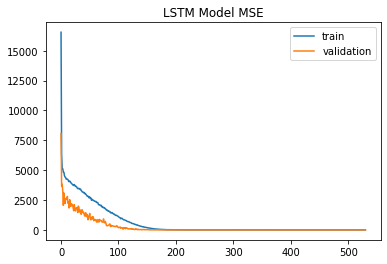

In [77]:
# ------ View History Graph -------------------------------------------
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.title('LSTM Model MSE')
plt.show()

45/45 [==============================] - 0s 10ms/step
R2 score before tuning: 0.9973295389410571
mean_squared_error before tuning: 0.8468485437594186


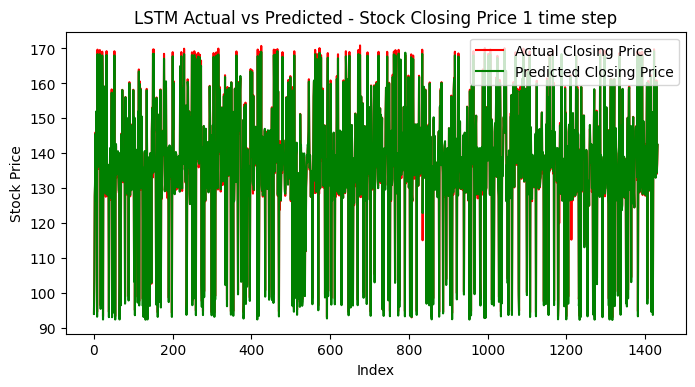

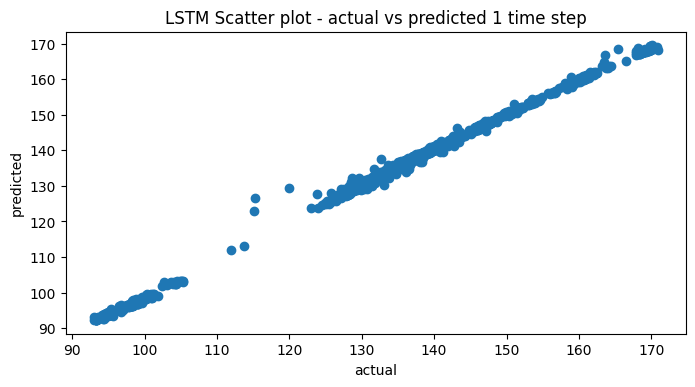

In [83]:
pred_lstm,r2_lstm_before_tuning,mse_lstm_before_tuning=showResult(x_validation_lstm,y_validation_lstm,'before tuning',model,'1 time step','LSTM')

# Hyperparameter Tuning For LSTM

In [ ]:
x,y=prepareDataForLSTM(x_df,y_df,24,1)

In [ ]:
y

array([161.02, 160.6 , 160.52, ...,  95.03,  94.94,  95.  ])

In [ ]:
x_train_tuning, x_validation_tuning, y_train_tuning, y_validation_tuning = train_test_split( x , y,test_size=0.2)

In [ ]:
D_out=1
Activation='exponential'
Input_shape=(x.shape[1],x.shape[2])
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=12,max_value=24,step=6),return_sequences=True, input_shape=Input_shape))
    model.add(Dropout(hp.Float('Dropout_rate_input_layer',min_value=0,max_value=0.5,step=0.1)))
    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=12,max_value=30,step=6),return_sequences=True))
        model.add(Dropout(hp.Float('Dropout_rate'+str(i),min_value=0,max_value=0.5,step=0.1)))
    model.add(LSTM(hp.Int(f'lstm_last_units',min_value=12,max_value=24,step=6)))
    for i in range(hp.Int('num_of_layers',1,5)): 
        model.add(Dense(units=hp.Int('num_of_neurons in Dense layer'+ str(i),min_value=12,max_value=24,step=6),
                                    activation=Activation))
    model.add(Dense(D_out, activation=Activation))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),metrics = ['mse'])
    return model

In [ ]:
#feeding the model and parameters to Random Search
lstm_tuner=RandomSearch(build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    project_name='lstm_checkpoint'
   )

In [ ]:
lstm_tuner.search_space_summary()

Search space summary
Default search space size: 9
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 24, 'step': 6, 'sampling': None}
Dropout_rate_input_layer (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 30, 'step': 6, 'sampling': None}
Dropout_rate0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
lstm_last_units (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 24, 'step': 6, 'sampling': None}
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
num_of_neurons in Dense layer0 (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 24, 

In [ ]:

checkpoint_filepath = 'checkpoint_2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
EP=1000
batch_size=120
#fitting the tuner
lstm_tuner.search( x_train_tuning, y_train_tuning, # try Option #1 และ Option #2
batch_size = batch_size,
validation_data=(x_validation_tuning, y_validation_tuning), epochs=EP,callbacks=[es,model_checkpoint_callback])

Trial 5 Complete [01h 02m 01s]
val_loss: 0.46001115441322327

Best val_loss So Far: 0.3722938895225525
Total elapsed time: 01h 48m 46s


In [ ]:
lstm_best_model = lstm_tuner.get_best_models()[0]


In [ ]:
lstm_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2880      
                                                                 
 dropout (Dropout)           (None, 24, 24)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 18)            3096      
                                                                 
 dropout_1 (Dropout)         (None, 24, 18)            0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 12)            1488      
                                                                 
 dropout_2 (Dropout)         (None, 24, 12)            0         
                                                                 
 lstm_3 (LSTM)               (None, 18)                2

In [ ]:
lstm_best_model.save('lstm_model_stacked')

In [85]:
lstm_after_tuning_model=keras.models.load_model('checkpoint_lstm_full_trained')

45/45 [==============================] - 3s 11ms/step
R2 score after tuning: 0.9987971564644028
mean_squared_error after tuning: 0.38144210831298114


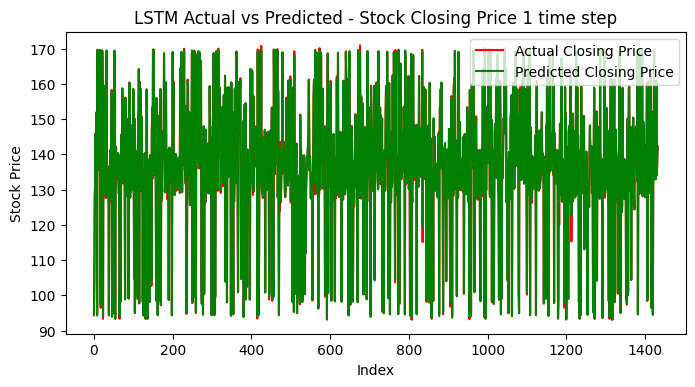

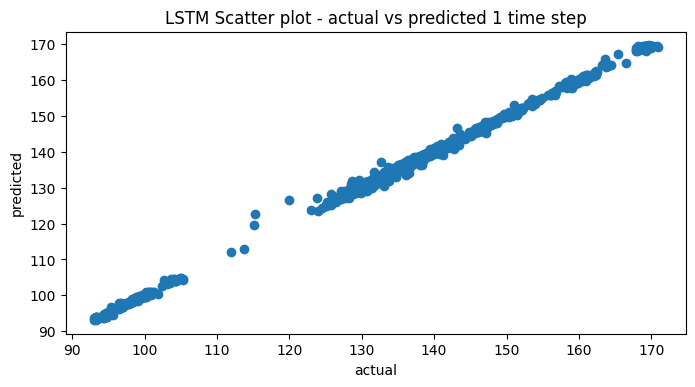

In [92]:
pred_lstm,r2_lstm_after_tuning,mse_lstm_after_tuning=showResult(x_validation_lstm,y_validation_lstm,'after tuning',lstm_after_tuning_model,'1 time step','LSTM')

In [95]:
r2_lstm_before_tuning

0.9973295389410571

In [96]:
r2_lstm_after_tuning

0.9987971564644028

In [93]:
model_R2=[r2_lstm_before_tuning,r2_lstm_after_tuning]
model_MSE=[mse_lstm_before_tuning,mse_lstm_after_tuning]

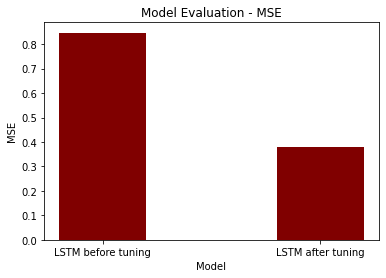

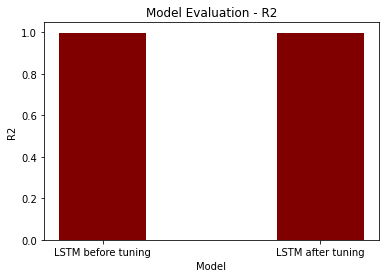

In [94]:
model_label=["LSTM before tuning","LSTM after tuning"]
metrics_label=['MSE','R2']
metrics=[model_MSE,model_R2]
for i in range(len(metrics)):
  # creating the bar plot
  plt.bar(model_label, metrics[i], color ='maroon',width = 0.4)
 
  plt.xlabel("Model")
  plt.ylabel(metrics_label[i])
  plt.title('Model Evaluation - '+metrics_label[i])
  plt.show()

# Model Testing for LSTM

In [ ]:
D_out=1
lstm_model=keras.models.load_model('lstm_model')
for layer in lstm_model.layers: layer.trainable = False
lstm_model.add(Flatten())
# lstm_model.add(Dense(D_out, activation='relu',name='output_dense'))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 12)            864       
                                                                 
 lstm_1 (LSTM)               (None, 24, 24)            3552      
                                                                 
 dropout (Dropout)           (None, 24, 24)            0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 30)            6600      
                                                                 
 dropout_1 (Dropout)         (None, 24, 30)            0         
                                                                 
 lstm_3 (LSTM)               (None, 24, 24)            5280      
                                                                 
 dropout_2 (Dropout)         (None, 24, 24)            0

In [ ]:
EP = 1000
batch_size = 120
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history = lstm_model.fit( x_train, y_train, batch_size = batch_size,
                    validation_data=(x_test, y_test), epochs=EP,callbacks=[es])

Epoch 1/1000
57/57 [==============================] - 10s 44ms/step - loss: 196.5700 - mse: 196.5700 - val_loss: 1.2863 - val_mse: 1.2863
Epoch 2/1000
57/57 [==============================] - 1s 14ms/step - loss: 1.9427 - mse: 1.9427 - val_loss: 1.1031 - val_mse: 1.1031
Epoch 3/1000
57/57 [==============================] - 1s 15ms/step - loss: 1.3096 - mse: 1.3096 - val_loss: 1.0654 - val_mse: 1.0654
Epoch 4/1000
57/57 [==============================] - 1s 15ms/step - loss: 1.2566 - mse: 1.2566 - val_loss: 0.9787 - val_mse: 0.9787
Epoch 5/1000
57/57 [==============================] - 1s 15ms/step - loss: 1.1322 - mse: 1.1322 - val_loss: 0.9485 - val_mse: 0.9485
Epoch 6/1000
57/57 [==============================] - 1s 14ms/step - loss: 1.1583 - mse: 1.1583 - val_loss: 0.9560 - val_mse: 0.9560
Epoch 7/1000
57/57 [==============================] - 1s 15ms/step - loss: 1.1386 - mse: 1.1386 - val_loss: 0.9436 - val_mse: 0.9436
Epoch 8/1000
57/57 [==============================] - 1s 15ms/st

KeyboardInterrupt: ignored

In [ ]:
return_period=24
x_df_test_1,y_df_test_1=prepareDataForLSTM(x_df_test,y_df_test,n_steps,return_period)

16/16 [==============================] - 2s 7ms/step
R2 score after tuning: -11.141235751558753
mean_squared_error after tuning: 22.36183429281789


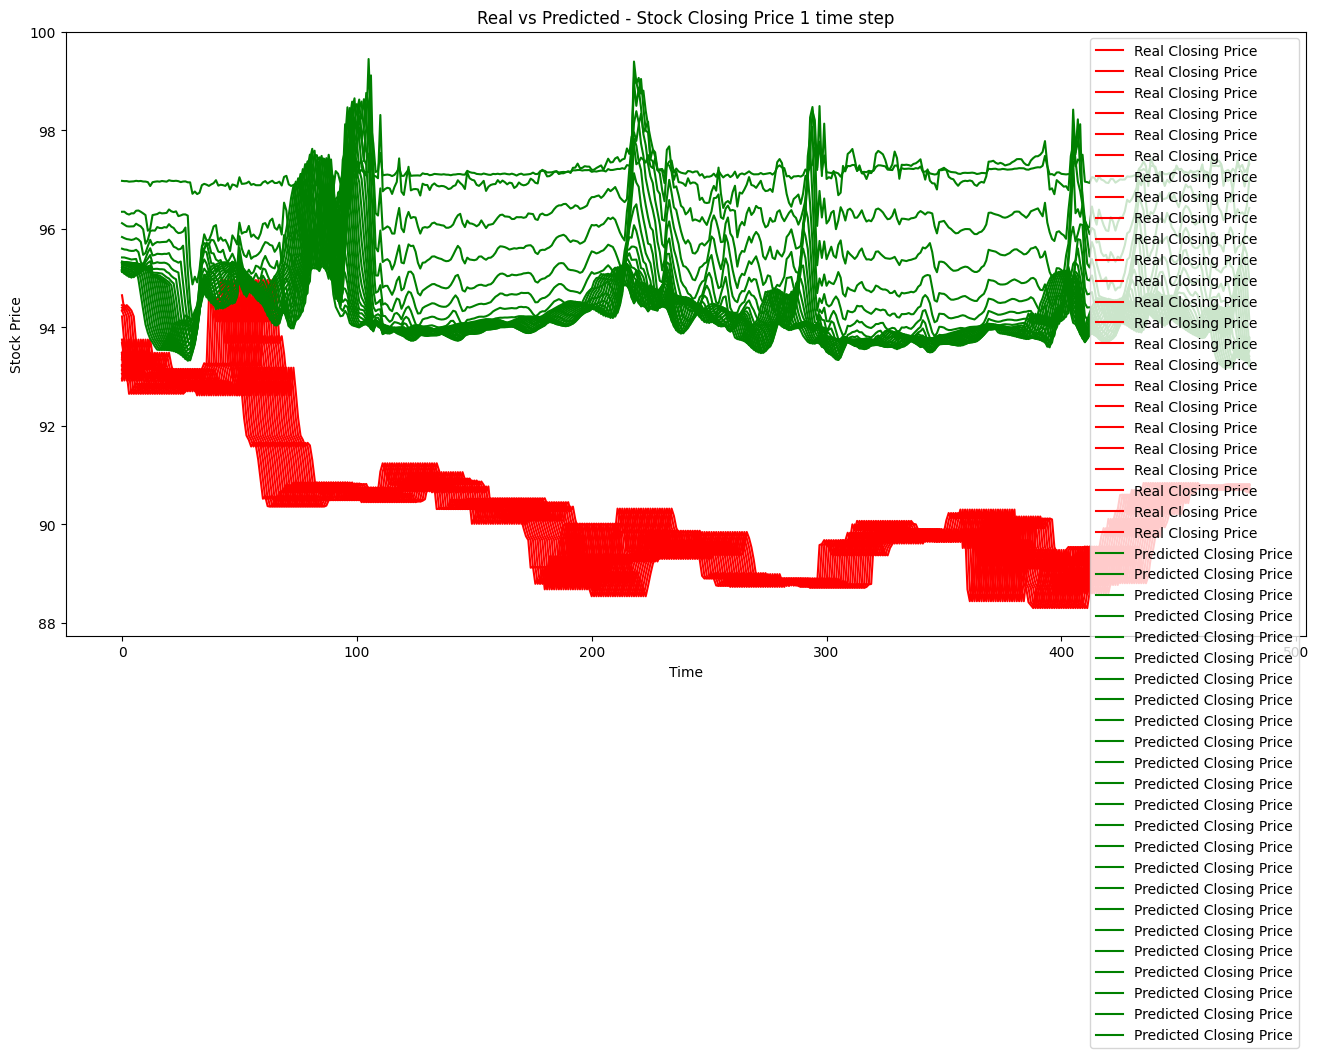

In [ ]:
pred_1,r2_lstm_best_1,mse_lstm_best_1=showResult(x_df_test_1,y_df_test_1,'after tuning',lstm_model,'1 time step')